 #  <font color='blue'> Исследования данных игр 
    
Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Шаг 1. Файл с данными и  общая информация

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Открытие файла с ввыведим 10 первые строка

path = r"C:\Users\Asus\yandex-praktikum\04 Сборный проект 1\analys_game_project_4.csv"
data =  pd.read_csv(path)

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
# Выводим иформацию о датасет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Датасет состосит из семи столбцов. В них нужно обработать пропущенные значеня, дубликатовю Бросается в глазах, то что тмп данных год выпуска object и райтинг пользователя оbject. Для дальнейшей обработки нужно заменить на временой тип данных и на float.

###  Шаг 2. Подготока данных

In [3]:
# Замена названия столбцов (перевод к нижнему регистру)
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Выводим пропущенные значения

data.isna().sum()



name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Вывод

Наблюдается пропущенные значеня в столбце "years_of_release", "critical_score", "user_score", "raiting'

In [5]:
# Рассмотрим характтер пропущених значении в столбце "year_of_release"
data[data['year_of_release'].isna()]



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# Не наблюдается патрон ощибки, а скорее всего это значения были допущена из-за чкловесеского фактора. 
# По сколько эти строки около 1,5% от общего количесва наюблюжений, из удаляем.

df = data.dropna(subset = ['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null float64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [7]:
# Рассмотрим характтер пропущених значении в столбце "critic_score"

df[df['critic_score'].isna()]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
# Рассмотрим характтер пропущених значении в столбце "user_score"

df[df['user_score'].isna()]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# Рассмотрим характтер пропущених значении в столбце "rating"

df[df['rating'].isna()]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

При рассмотрении пропущеных значений столбцов "critic_score", "user_score" и "rating" наблюдается ее болшое доля   относительно общему количество значении. Поэтому нецелосообразно их удалению. Так же наблюдается в столбце "user_score' значение 'tbd' который означает to be determinated, то есть пока не определен. Tbd значение заменям на NaN для дальнейшего анализа

In [10]:
# Заменя тип cтольбца year_of_release на численый тип, для дальгейшей обработка или группировка по году выпуска.

df['year_of_release'] = df['year_of_release'].astype('int')
df.head()


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
# Рассмотрим количество строк со значением tbd в столбце user_score
len(df[df['user_score'] == 'tbd'])

2376

In [12]:
# Замена значение tbd в столбце  user_score на значение NaN , для дальгейшей обработки или группировки 
df = df.replace({'user_score' : 'tbd' }, np.nan)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
# Проверка отсутвие значения tbd
len(df[df['user_score'] == 'tbd'])

0

In [14]:
# Замена тип данных столбца user_score

df['user_score'] = pd.to_numeric(df['user_score'] , downcast = 'float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int32
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float32
rating             9768 non-null object
dtypes: float32(1), float64(5), int32(1), object(4)
memory usage: 1.4+ MB


In [15]:
# Суммарные  продажи во всех регионах 

df['total_sales'] = df[['na_sales','eu_sales', 'jp_sales','other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [16]:
# Приск дупликатов
df.duplicated().sum()

0

## Шаг 3. Исследовательский анализ данных

In [17]:
# Количество выпущенных игр по годамю
sales_years =  df.groupby(['year_of_release'])['name'].count()
sales_years.sort_index(ascending = False).head(20)


year_of_release
2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
Name: name, dtype: int64

In [18]:
# Суммарные продажи по платформам
groupby_platform = df.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False)
top_platforms = groupby_platform.head(5)
top_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

In [19]:
# Словарь с платформами с найбольшими продажами
dict_platforms  =  top_platforms.reset_index()['platform']
dict_platforms


0     PS2
1    X360
2     PS3
3     Wii
4      DS
Name: platform, dtype: object

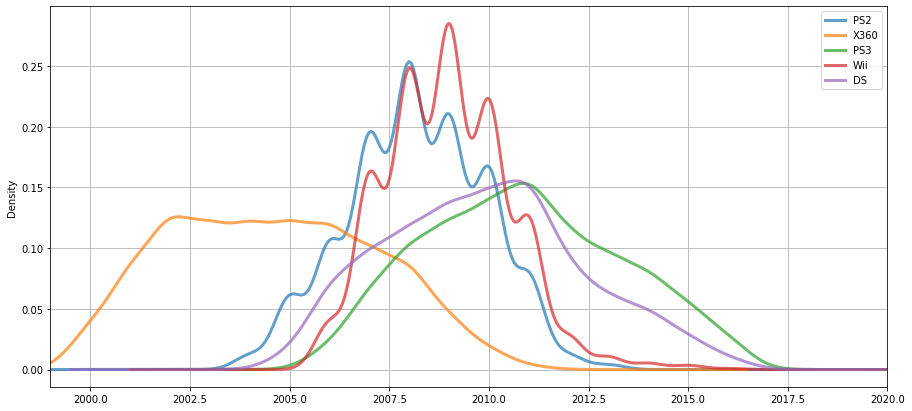

In [20]:
# Срез данных по словарью с большем количкство продаж и его групировка по платформам
platforms = df.query('platform in @top_platforms.index')[['year_of_release' , 'platform']].groupby('platform')

# Построение полтночтей частоты для платформ с большем количеством сумарными продажами
for platform, platforms_df in platforms:
    subset = platforms.get_group(platform) 
    subset['year_of_release'].plot(  kind = 'density' ,  grid = True, figsize = (15,7),
                                    linewidth = 3, alpha = 0.7, xlim = (1999, 2020), legend = True, 
                                  )
    plt.legend( dict_platforms)



### Вывод

Из графиков плотностей платформ с наиболшими сумарными продажами можно определить что жизненые цикл каждой платформы составляет около 10 лет. Исходя из данного вывода можно определить что актуальный период анализа для прогнозирование на 2017 год целособрасно определить период из 2012 г, для того чтобы нагладнее посмотреть на динамику продаж.

In [21]:
# Срезаем данных актульного периода.

actual_period = df.query(' year_of_release > 2012')
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [22]:
# Платформы лидируют по продажам.

purchase_rating =actual_period.groupby('platform')['total_sales'].sum().sort_values(ascending = False )
purchase_rating

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [23]:
purchase_dinamics = actual_period.groupby(['platform' , 'year_of_release'])['total_sales'].sum()
purchase_dinamics

platform  year_of_release
3DS       2013                56.57
          2014                43.76
          2015                27.78
          2016                15.14
DS        2013                 1.54
PC        2013                12.38
          2014                13.28
          2015                 8.52
          2016                 5.25
PS3       2013               113.25
          2014                47.76
          2015                16.82
          2016                 3.60
PS4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
PSP       2013                 3.14
          2014                 0.24
          2015                 0.12
PSV       2013                10.59
          2014                11.90
          2015                 6.25
          2016                 4.25
Wii       2013                 8.59
          2014                 3.75
          2015                 1.14
  

In [24]:
dict_platforms = purchase_rating.reset_index().platform
dict_platforms

0      PS4
1      PS3
2     XOne
3      3DS
4     X360
5     WiiU
6       PC
7      PSV
8      Wii
9      PSP
10      DS
Name: platform, dtype: object

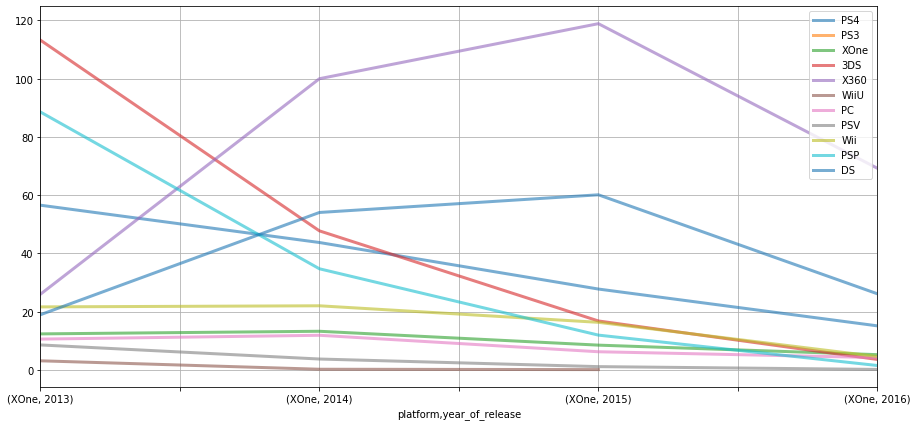

In [25]:
# Гркпировуа по платформам 
dinamics = purchase_dinamics.groupby('platform')

# Построение графиков суммарных продаж по платформам 
for platform, purchase_df in dinamics :
    subset = dinamics.get_group(platform) 
    subset.plot( x= 'year_of_release'  ,  y = 'total_sales',  kind = 'line' ,  grid = True, figsize = (15,7),
                                    linewidth = 3, alpha = 0.6,  legend = True, 
                                  )
    plt.legend(dict_platforms)
    
    

In [26]:
# Словарь с платформами со найлучгими продажами
dict_boxplot = purchase_rating.reset_index()['platform'][0:5]
dict_boxplot

# Срез данных с перспектывними платформами с 2012 года до 2016
perspective_platforms = actual_period.query('platform in @dict_boxplot').reset_index()
perspective_platforms.head()

   

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


(0, 2)

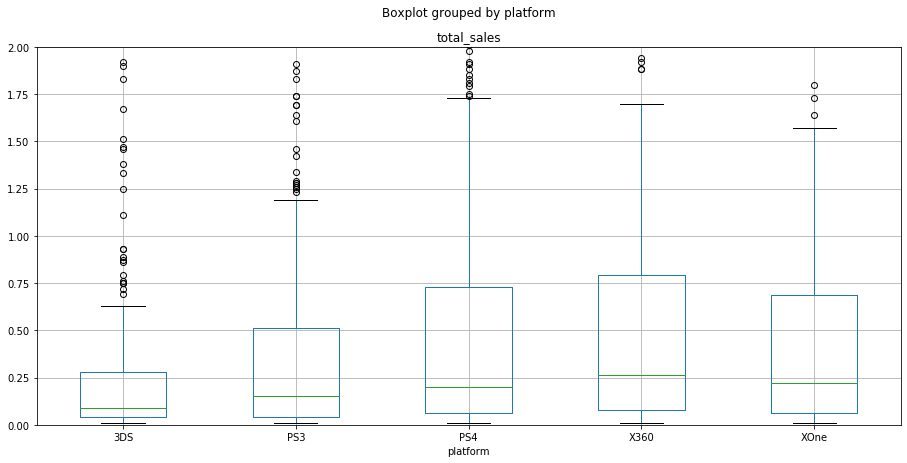

In [27]:
# Построение ящик с усами самых прибылных платформ
perspective_platforms.boxplot(column="total_sales", by="platform", figsize = (15,7))
plt.ylim(0,2)

### Вывод

Медиана по продажам отличается не сильно. Это говорит о высокой конкуренций среды разных платформ. Так же игры  PS4 и X360 являются в среднем дороже и популярнее чем другие платформы.

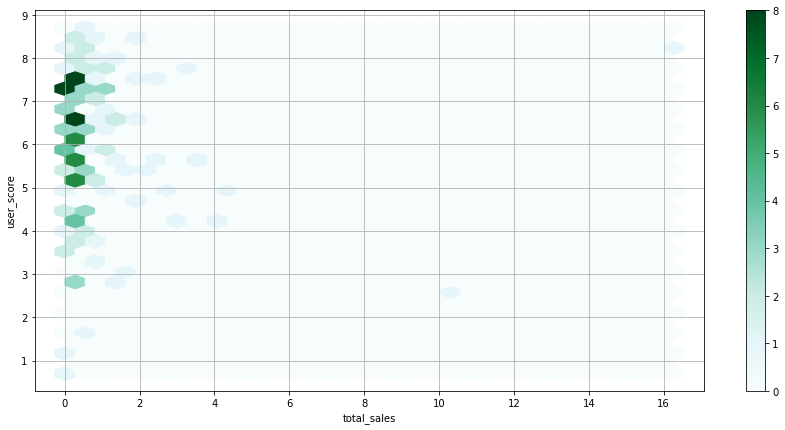

In [28]:

#Диаграмма рассеяния продажи от отзывов пользователей 

x360_df = perspective_platforms.query('platform == "X360"')

x360_df .plot(x='total_sales', y='user_score', kind='hexbin', 
              gridsize=30, figsize=(15, 7), sharex=False, grid=True )


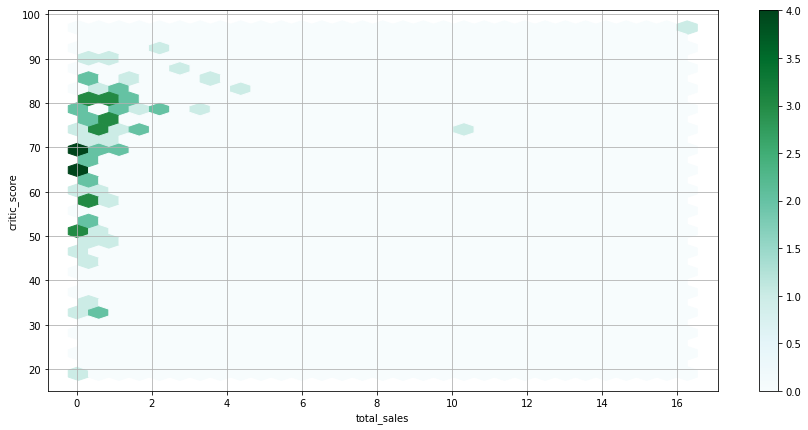

In [29]:
#Диаграмма рассеяния продажи от отзывов критиурв 
x360_df .plot(x='total_sales', y='critic_score', kind='hexbin', 
              gridsize=30, figsize=(15, 7), sharex=False, grid=True )
    
    

In [30]:
# Корреляцию между отзывами пользователей и продажами. 
corelation = perspective_platforms.groupby('platform')
for platform, purchase_df in corelation :
    subset = corelation.get_group(platform) 
    coef_corr = subset.total_sales.corr(subset.user_score).round(3)
    print('Коэффициент кореляции' , platform , 'от отзывов пользователей', coef_corr.round(3))
    print()


Коэффициент кореляции 3DS от отзывов пользователей 0.242

Коэффициент кореляции PS3 от отзывов пользователей 0.002

Коэффициент кореляции PS4 от отзывов пользователей -0.032

Коэффициент кореляции X360 от отзывов пользователей -0.012

Коэффициент кореляции XOne от отзывов пользователей -0.069



In [31]:
# Корреляцию между отзывами критиков и продажами. 
for platform, purchase_df in corelation :
    subset = corelation.get_group(platform) 
    coef_corr = subset.total_sales.corr(subset.critic_score).round(3)
    print('Коэффициент кореляции' , platform , 'от отзывов критиков', coef_corr.round(3))
    print()

Коэффициент кореляции 3DS от отзывов критиков 0.357

Коэффициент кореляции PS3 от отзывов критиков 0.334

Коэффициент кореляции PS4 от отзывов критиков 0.407

Коэффициент кореляции X360 от отзывов критиков 0.35

Коэффициент кореляции XOne от отзывов критиков 0.417



### Вывод

Из диаграммы рассеяния следует что  отзывов пользователей не вляют сушественно на продажи по скольку практически весь диапазон отзивов не меняет тенденция на продаж. Этим выводом поддвежтдается величину коэффициента коррелляци который находится около нуля.

Так же можно отметить что положительные отзывы критиков влияет на продажи, но ее вклад являеся сушкственым. Коэффициент корреллаяции продаж от отзывов критиков больще чем коэффйициент корреляция продажи от отзывов пользователей. Что означает то критики больше влияют на количество продаж

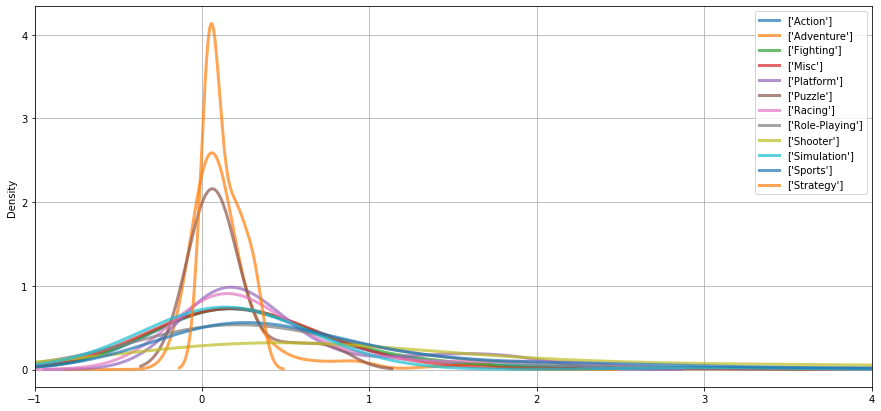

In [32]:
# Группируем датафрэйм по жнрам
purchase_genres =  perspective_platforms.groupby('genre')

# Словарь с именнами всех жанаров.
dict_genres = purchase_genres.genre.unique()

# Построение плотьность распределения сумммарных продаж по жанрам 

for genre, purchase_df in purchase_genres :
    subset = purchase_genres.get_group(genre) 
    subset.total_sales.plot(  kind = 'density' , grid = True, figsize = (15,7),
                                    linewidth = 3, alpha = 0.7, legend = True , xlim = (-1,4)
                                  )
    plt.legend( dict_genres)
    


### Вывод

Из графика следует что чаще выпускаются игри по жанарам Adventure, Strategy и Platform, но в то же время их продажи не отличаются высокими показателями. С другой стороны жанары Shooter, Sports и Action Выпускаются меньше но их выручки распределается в больше диапазоне, а следовательно их продажи выручки высше чем у других жанров.

## Шаг 4. Составьте портрет пользователя каждого региона

In [33]:
#Самые популярные платформы (топ-5). 

# Построение свобную таблицу по платформам и проддажам
rating_region = df.pivot_table(index = 'platform' , 
                            values = ['na_sales','eu_sales','jp_sales',
                                      'total_sales'], aggfunc = 'sum')

rating_region.head()
   

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
2600,4.86,0.00,80.78,86.48
3DO,0.00,0.10,0.00,0.10
3DS,61.27,100.62,82.65,257.81
DC,1.69,8.56,5.43,15.95
DS,188.41,175.02,380.31,802.78


In [34]:
# Добавляем столбцы с долями продажи 
rating_region['na_ratio'] = rating_region.na_sales / rating_region.total_sales
rating_region['eu_ratio'] = rating_region.eu_sales / rating_region.total_sales
rating_region['jp_ratio'] = rating_region.jp_sales / rating_region.total_sales

rating_region.head()

,eu_sales,jp_sales,na_sales,total_sales,na_ratio,eu_ratio,jp_ratio
platform,,,,,,,
2600,4.86,0.00,80.78,86.48,0.934089,0.056198,0.000000
3DO,0.00,0.10,0.00,0.10,0.000000,0.000000,1.000000
3DS,61.27,100.62,82.65,257.81,0.320585,0.237656,0.390287
DC,1.69,8.56,5.43,15.95,0.340439,0.105956,0.536677
DS,188.41,175.02,380.31,802.78,0.473741,0.234697,0.218017


In [35]:
# Выводим топ 5 платформы по регионам
rating_eu = rating_region[['eu_sales', 'eu_ratio']].sort_values(ascending = False,by = 'eu_sales').head()
rating_jp = rating_region[['jp_sales', 'jp_ratio']].sort_values(ascending = False,by = 'jp_sales').head()
rating_na = rating_region[['na_sales', 'na_ratio']].sort_values(ascending = False,by = 'na_sales').head()

print(rating_eu, rating_jp, rating_na)

          eu_sales  eu_ratio
platform                    
PS2         332.63  0.269650
PS3         327.21  0.351332
X360        268.32  0.279139
Wii         258.32  0.289863
PS          212.39  0.291913           jp_sales  jp_ratio
platform                    
DS          175.02  0.218017
PS          139.78  0.192116
PS2         137.54  0.111498
SNES        116.55  0.582633
3DS         100.62  0.390287           na_sales  na_ratio
platform                    
X360        595.74  0.619762
PS2         572.92  0.464444
Wii         486.87  0.546321
PS3         390.13  0.418891
DS          380.31  0.473741


### Вывод

Из полученых результатов можно сделать вывод что регион Европа и Сверная Америка популяоными платформами являются PS2, PS3 X360 и Wii. Доля продаж в Северной Америке больше чем в Европе, то что говорит о масштабе рынка Северной Америки. В Японии совершено иная картина популярных платформ а их доля рынка меньше чем в другиз регионах.

In [36]:
#Самые популярные жанры (топ-5)

# Сводная таблица по жанрам и и продажам.
purchase_genres =  perspective_platforms.pivot_table(index = 'genre', values= ['na_sales','eu_sales','jp_sales'], 
                                                        aggfunc = ('sum'))

purchase_genres


,eu_sales,jp_sales,na_sales
genre,,,
Action,105.06,32.82,113.72
Adventure,6.97,3.17,6.41
Fighting,6.88,5.98,12.09
Misc,13.58,4.95,20.46
Platform,9.07,2.34,8.91
Puzzle,0.61,0.91,0.21
Racing,17.04,0.93,9.64
Role-Playing,32.70,42.50,42.39
Shooter,79.99,5.02,103.89


In [37]:

# Выведим топ 5 по регионам.
for row in purchase_genres:
    subset =  purchase_genres.reset_index()[['genre', row]].sort_values(by=row, ascending =False).head()
    print(subset)
    print()

           genre  eu_sales
0         Action    105.06
8        Shooter     79.99
10        Sports     56.38
7   Role-Playing     32.70
6         Racing     17.04

          genre  jp_sales
7  Role-Playing     42.50
0        Action     32.82
2      Fighting      5.98
8       Shooter      5.02
3          Misc      4.95

           genre  na_sales
0         Action    113.72
8        Shooter    103.89
10        Sports     63.64
7   Role-Playing     42.39
3           Misc     20.46



### Вывод

В регион Северной Америки и Европы одинаковые популярные жанры, даже по порядку. В регион Япония входят другой жанр как Fighting , и порядок популярности другой, а именно жанр Role Playing занимает первое место.

In [38]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе?

by_ersb = actual_period.groupby('rating' )['eu_sales', 'jp_sales', 'na_sales', 'total_sales'].sum()
by_ersb

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
E,83.36,15.14,79.05,200.16
E10+,42.69,5.89,54.24,115.39
M,145.32,14.11,165.21,371.68
T,41.95,20.59,49.79,126.62


### Вывод

На первый взгляд класиффикация по ERSB не оказывает влияние на продажи по регионам.

## Шаг 5. Гипотезы

In [39]:
#Средние  пользовательские рейтинги платформ Xbox One 

xone_df = actual_period.query('platform == "XOne"').dropna(subset = ['user_score']).reset_index()

xone_df.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1,179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
2,242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
3,270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
4,373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [40]:
# Формируем массив платформы Xbox One для сравнения .
xone_user_score = pd.Series(xone_df['user_score'])

xone_user_score

0      7.9
1      5.4
2      6.4
3      6.2
4      4.1
      ... 
177    6.8
178    6.0
179    8.2
180    6.6
181    6.7
Name: user_score, Length: 182, dtype: float32

In [41]:
#Средние  пользовательские рейтинги платформ PC
pc_df = actual_period.query('platform == "PC" ').dropna(subset = ['user_score']).reset_index()

pc_df.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1,1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
2,1351,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
3,1437,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
4,1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28


In [42]:
# Формируем массив платформы PC для сравнения .
pc_user_score = pd.Series(pc_df['user_score'])

pc_user_score

0      3.9
1      7.9
2      2.2
3      6.0
4      5.4
      ... 
150    8.3
151    6.8
152    7.9
153    1.4
154    7.6
Name: user_score, Length: 155, dtype: float32

In [43]:
from scipy import stats as st

alpha = 0.05

# Проверим гипотезу о равенстве средних двух независимых совокупностей
results_1 = st.ttest_ind(
    xone_user_score, 
    pc_user_score)

# выведим на экран получившееся p-значени
print('p-значение: ', results_1.pvalue)

#  сравнение  получившееся p-значение с заданным уровнем статистической значимости):
if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14012764978158274
Не получилось отвергнуть нулевую гипотезу


### Вывод
Нулевая гипотеза: Средные значения отзывов пользователей платформы Xbox One равно средному значению отзывов пользователей платформы PC
Алтернативная гипотеза:Средные значения отзывов пользователей платформы Xbox One не равно средному значению отзывов пользователей платформы PC

Для проверки гипотезы исползуем гипотезу о равенстве средних двух средных  генеральных совокупностей.

Не получилось отвергать нулевую гипотезу поскольку с вероятностью 14% что средные значения одинаковые.

In [44]:
#Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

# Срез данных по жанру Action, удаляем проаущеные значения .
action_df = actual_period.query(' genre ==  "Action"').dropna(subset = ['user_score']).reset_index()

action_df

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
4,165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
385,16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
386,16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
387,16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


In [45]:
# Формируем массив жанра Action  для сравнения .

action_user_score = pd.Series(action_df['user_score'])
action_user_score.head()

0    8.2
1    8.1
2    8.3
3    9.1
4    7.9
Name: user_score, dtype: float32

In [46]:
# Срез данных по жанру Sports, удаляем проаущеные значения .
sports_df = actual_period.query(' genre ==  "Sports"').dropna(subset = ['user_score']).reset_index()

sports_df

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
1,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
2,126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
3,143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
4,264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,16142,MLB 15: The Show,PSV,2015,Sports,0.01,0.00,0.00,0.00,NaN,8.8,E,0.01
156,16146,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01
157,16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
158,16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,1.4,E,0.01


In [47]:
# Формируем массив жанра Sports  для сравнения .
sports_user_score =  pd.Series(sports_df['user_score'])
sports_user_score.head()

0    4.3
1    5.0
2    4.3
3    5.7
4    4.5
Name: user_score, dtype: float32

In [48]:
# Проверим гипотезу о равенстве средних двух независимых совокупностей
results_2 = st.ttest_ind(
    action_user_score, 
    sports_user_score)

# выведим на экран получившееся p-значени
print('p-значение: ', results_2.pvalue)

#  сравнение  получившееся p-значение с заданным уровнем статистической значимости):
if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.0517786467865278e-27
Отвергаем нулевую гипотезу


### Вывод

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие») равно Sports (англ. «виды спорта»).

Алтернативная гипотеза:Средние пользовательские рейтинги жанров Action (англ. «действие») разные Sports (англ. «виды спорта»).

Для проверки гипотезы исползуем гипотезу о равенстве средних двух средных генеральных совокупностей.

Отвергаем нулевую гипотезу поскольку с вероятностью 1,27х10-26% что средные значения одинаковые. То есть она очень близко к нулю.

## Общие Выводы

После исследование данных можно указать следующие:

- Средный жизненый цикл платформы является от 10 до 12 лет.
- Изходя из графиков продажи платформы которые не достишли свой пик продажи Xbox One, PS4 и 3DS
- Из граффик плотности распределения продажи по жнрам следует что самые часто выкускаемые являются Adventure, Strategy y Platform но их средное значения и дисперся находится близко к нулью. Что говорит о не комерческий успех данных жанров. Из другой стороны жанры Action, Shooter и Sports, данные жанры реже выпускаются но их распределение продаж шире и срежнее значение больше чем у других.
- Поведения потребления отличается между пользователей Японии и пользователей Северной аиерики и Европы.Это касается предпочитения по платформам и по жнрам . Так же райтинг ESBS не сушествено влияет на продажи.
- Отзывы от пользователей ни имеют корреляцю с продажами. Но отзывы оот критикрв имеют коэффициент корелляци около 0,40 то что означает что их вдияние на продажи присутсвует.
- Больще доля продаж осуществляются в Северной Америки. 
- Выдвинулось гипотезы о том что Средние пользовательские рейтинги платформ Xbox One и PC одинаковыею После статестической проверки не получилочт отвергать эту гипотезу поскольку с доля вероятности в 14% что эти значения окажутся одинаковые, то что привышает установленную пороговую значения в 5%.
- Вторая гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. Мы получили что эти значения могут быть одинаковые с долей вероятности 1х10-27, то есть с вероятностью очень близко к нулию, что позволяет сказать что предложеная гипотеза разное.


Сегмент который предпологается рост -  это те платформы которые их жизненый цикл больше 3 года но меньще 8 лет. Следует обратить внимание на отзывы критиков, поскольку их райтинг косвено влияет на продажи.

Так же нужно учытивать особености региогов по платформам и жнарам для того чтобы выстроить рекламную компанию.


